This project has a large file size 

Follow these instructions to use LFS on Github
- git lfs install
- git lfs track 'data/yelp-reviews.csv'
- git add .gitattributes
- git add data/yelp-reviews.csv
- git commit -m 'Track large file with Git LFS'
- git push origin main 

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### **Load data**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
def load_data(file_path):
    df = pd.read_csv(file_path)

    return df
file_path ='data/yelp-reviews.csv'
df = load_data(file_path)
df.head()

,business_id,review_id,date,text,stars,language
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,Lynn and Montecito flowers are simply the best...,5,en
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,Love this place! Always loved the food as they...,5,en
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,We stayed here last weekend with our dog. Its ...,5,en
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,Came here for a quick bite and got the thai sa...,2,en
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,Finally was able to try lunch at Holdren's. M...,2,en


In [6]:
# EDA 
def perform_eda(df):
    missing_values = df.isna().sum()
    print
    return df
perform_eda(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150374 entries, 0 to 150373
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  150374 non-null  object
 1   review_id    150374 non-null  object
 2   date         150374 non-null  object
 3   text         150374 non-null  object
 4   stars        150374 non-null  int64 
 5   language     150374 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.9+ MB


In [7]:
# Summary statistics
statistics = df.describe().T
statistics

,count,mean,std,min,25%,50%,75%,max
stars,150374.0,4.006045,1.415824,1.0,3.0,5.0,5.0,5.0


### **Data Visualization**

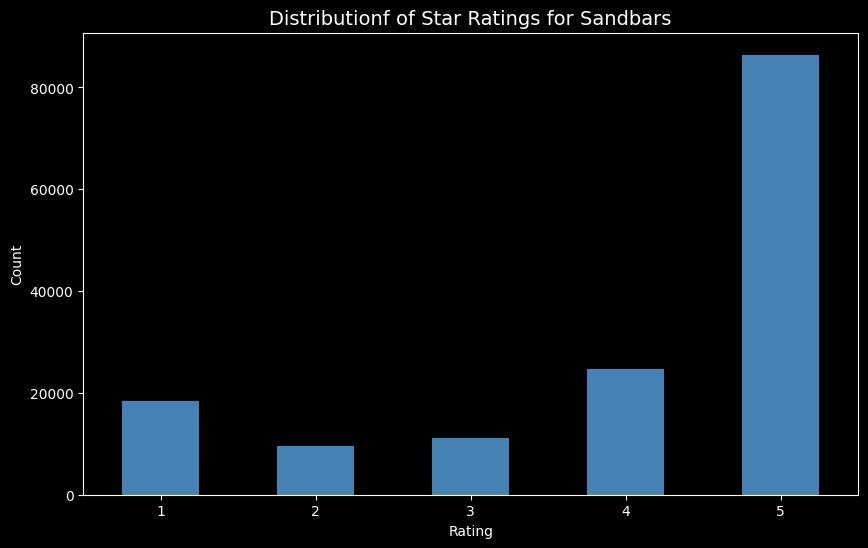

In [8]:
# Dark mode
plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
df['stars'].value_counts().sort_index().plot(kind='bar', color='steelblue')

plt.title('Distributionf of Star Ratings for Sandbars', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### **Data Preprocessing**

In [9]:
import re

# Cleant text data
def clean_data(df, text_column):

    # Remove missing values
    df = df.dropna(subset=[text_column,'stars'])

    # Normalize text data
    df[text_column] = df[text_column].str.lower()   

    # Remove punctuation and special characters
    df[text_column] = df[text_column].apply(lambda x:re.sub(r'[^A-Za-z\s]', '', x))

    return df

df = clean_data(df, text_column='text')
df.head()



,business_id,review_id,date,text,stars,language
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,lynn and montecito flowers are simply the best...,5,en
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,love this place always loved the food as they ...,5,en
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,we stayed here last weekend with our dog its a...,5,en
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,came here for a quick bite and got the thai sa...,2,en
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,finally was able to try lunch at holdrens my ...,2,en


In [10]:
# Check for Nan/missing values in the text column
missing_text = df['text'].isna().sum()
print(f'Number of missing text values: {missing_text}')


Number of missing text values: 0


### **Feature Engineering**

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt_tab')

# Instantialize the stopwords object
stop_words = set(stopwords.words('english'))

# Preprocess text => tokens, remove stopwords and join tokens
def preprocess_text_to_tokens(text):

    # Tokenize text and filter stopwords
    filtered_tokens= [
        word for word in word_tokenize(text.lower()) if word not in stop_words
    ]

    # Join the tokens into a string
    return ' '.join(filtered_tokens)

# Create a tokens column and apply preprocessing to the text column and store results in a tokens column
df['tokens']= df['text'].apply(preprocess_text_to_tokens)

# Check transformation
df[['text','tokens']].head() # return only text and tokens columns

[nltk_data] Downloading package punkt_tab to C:\Users\User
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,tokens
0,lynn and montecito flowers are simply the best...,lynn montecito flowers simply best awesome cho...
1,love this place always loved the food as they ...,love place always loved food truly due killer ...
2,we stayed here last weekend with our dog its a...,stayed last weekend dog motel style inside fou...
3,came here for a quick bite and got the thai sa...,came quick bite got thai salad bowl white bean...
4,finally was able to try lunch at holdrens my ...,finally able try lunch holdrens husband ordere...


In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Instantialize the stopwords object
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess text => lemmas, remove stopwords and join lemmmas
def preprocess_text_to_lemmas(text):

    # Lemmatize text and filter stopwords
    lemmas = [
        lemmatizer.lemmatize(word) for word in word_tokenize(text.lower()) if word not in stop_words
    ]

    # Join the tokens into a string
    return ' '.join(lemmas)

# Create a lemmas column and apply preprocessing to the text column and store results in a lemmas column
df['lemmas']= df['text'].apply(preprocess_text_to_lemmas)

# Check transformation
df[['text','lemmas']].head() # return only text and lemmas columns

,text,lemmas
0,lynn and montecito flowers are simply the best...,lynn montecito flower simply best awesome choi...
1,love this place always loved the food as they ...,love place always loved food truly due killer ...
2,we stayed here last weekend with our dog its a...,stayed last weekend dog motel style inside fou...
3,came here for a quick bite and got the thai sa...,came quick bite got thai salad bowl white bean...
4,finally was able to try lunch at holdrens my ...,finally able try lunch holdrens husband ordere...


In [17]:
# Display transformed dataframe
df.head()

,business_id,review_id,date,text,stars,language,tokens,lemmas
0,gGaF0TtGRx1QOFe0EzuZLg,8W3g9ykr8aGGZMMdVbNPKA,2015-01-01 00:01:02,lynn and montecito flowers are simply the best...,5,en,lynn montecito flower simply best awesome choi...,lynn montecito flower simply best awesome choi...
1,2CqQ3Tnvj7h0rw84WEEjMw,q10HcbeBRtcvsN7WC02fFw,2015-01-01 00:15:12,love this place always loved the food as they ...,5,en,love place always loved food truly due killer ...,love place always loved food truly due killer ...
2,lOa1BVmTcbPpu05h3OPAQA,dXOY5UqXhcCQ6f9S-kRc2w,2015-01-01 00:19:36,we stayed here last weekend with our dog its a...,5,en,stayed last weekend dog motel style inside fou...,stayed last weekend dog motel style inside fou...
3,QFh-h_OZ5Io-mBk32HN28A,8mWVoTXecEkRXTvPONYFuw,2015-01-01 00:20:23,came here for a quick bite and got the thai sa...,2,en,came quick bite got thai salad bowl white bean...,came quick bite got thai salad bowl white bean...
4,cAbdvzqtFLaAAMFIyPf2AA,Xr5KEchLr-jvQiAZm1mtNA,2015-01-01 00:47:19,finally was able to try lunch at holdrens my ...,2,en,finally able try lunch holdrens husband ordere...,finally able try lunch holdrens husband ordere...


### **Time Series Preprocessing**
 - Create a resampled dataset for time series analysis
 


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert dates to datetime
def convert_to_datetime(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce') #Convert date column into datetime, and handle errors

    return df

# Set the date as the index
def set_date_as_index(df, date_column):
    df.set_index(date_column, inplace=True)

    return df

# Resample the data by monthly intervals 
def resample_data(df , interval='ME'): # M - monthly, D- daily, W for weekly
    df_resampled = df.resample(interval).mean()

    return df_resampled

In [20]:
# # Convert date to date time 
# df = convert_to_datetime(df, date_column='date')
# df = set_date_as_index(df, date_column='date')

# # Resample data to monthly 
# df_resampled =  resample_data(df, interval='ME')

# # Display resampled dataframe
# df_resampled.head()

TypeError: agg function failed [how->mean,dtype->object]

In [21]:
# Reset index if 'date' is currently an index and not a column
df.reset_index(inplace=True)

# Then you can apply your original function to convert 'date' column to datetime
df = convert_to_datetime(df, date_column='date')

# After conversion, set 'date' back as the index
df = set_date_as_index(df, date_column='date')

def resample_numeric_data(df, interval='M'):
    # Select only numeric columns for resampling
    numeric_df = df.select_dtypes(include='number')
    df_resampled = numeric_df.resample(interval).mean()
    return df_resampled

# Check if 'date' is already set as index
if 'date' in df.columns:
    df = set_date_as_index(df, date_column='date')

# Resample numeric data only
df_resampled = resample_numeric_data(df, interval='M')

# Check resampled data
df_resampled.head()

C:\Users\User 1\AppData\Local\Temp\ipykernel_2056\2098222764.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = numeric_df.resample(interval).mean()


,stars
date,
2015-01-31,3.936967
2015-02-28,3.932598
2015-03-31,3.923698
2015-04-30,3.962856
2015-05-31,3.933677


In [22]:
# Save the dataframe 
output_path =  'data/reviews_processed_tsa.csv'
df_resampled.to_csv(output_path)
print(f'Processed dataframe saved to {output_path}')

Processed dataframe saved to data/reviews_processed_tsa.csv


In [23]:
# Load cleaned dataframe
df_resampled = pd.read_csv('data/reviews_processed_tsa.csv', keep_default_na=False)

# Check for missing values
missing_values = df_resampled.isna().sum()
print(f'Number of missing values : {missing_values}')

Number of missing values : date     0
stars    0
dtype: int64


### **Time Series Analysis**


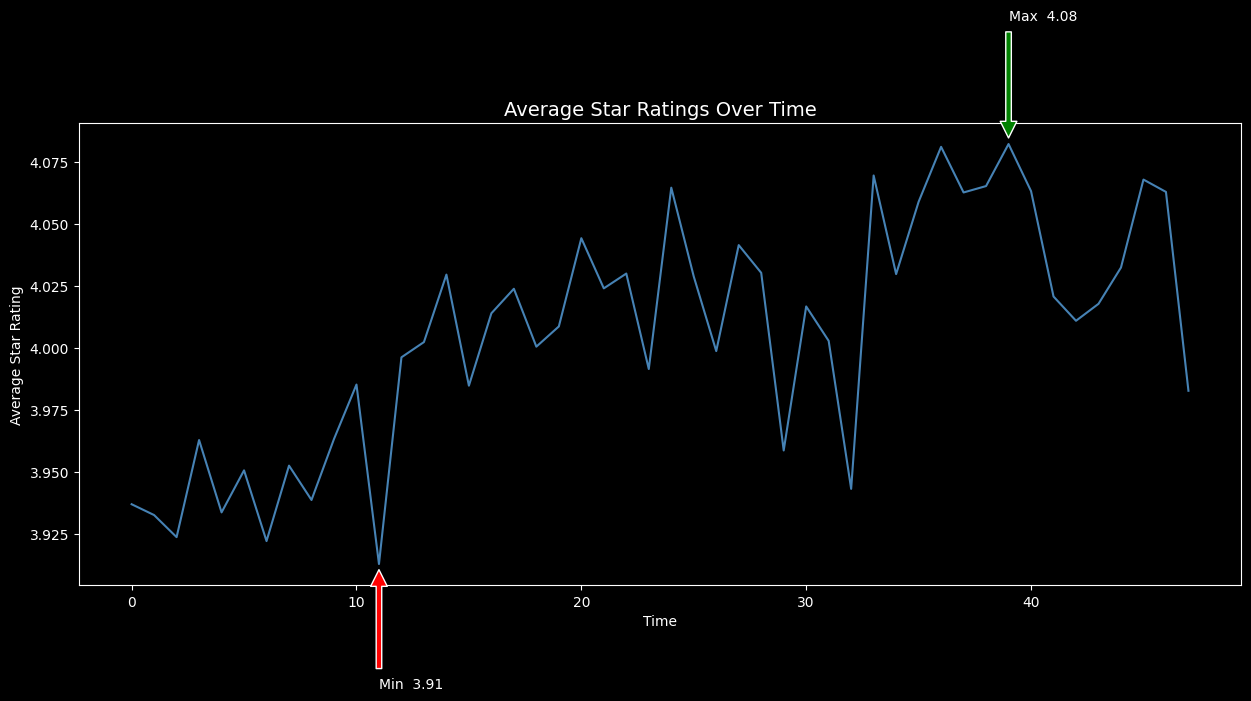

In [28]:
import matplotlib.pyplot as plt

# Annotating the highest and lowest points
max_value = df_resampled['stars'].max()
min_value = df_resampled['stars'].min()
max_date = df_resampled['stars'].idxmax()
min_date = df_resampled['stars'].idxmin()

plt.figure(figsize=(15, 6))
plt.plot(df_resampled.index, df_resampled['stars'], color ='steelblue')
plt.title('Average Star Ratings Over Time' , fontsize=14)
plt.xlabel('Time')
plt.ylabel('Average Star Rating')


plt.annotate(f'Max {max_value: .2f}',
             xy=(max_date, max_value),
             xytext=(max_date, max_value + 0.05),
             arrowprops=dict(facecolor='green', shrink=0.05),)
             

plt.annotate(f'Min {min_value: .2f}',
             xy=(min_date, min_value),
             xytext=(min_date, min_value + - 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))
             

plt.show()

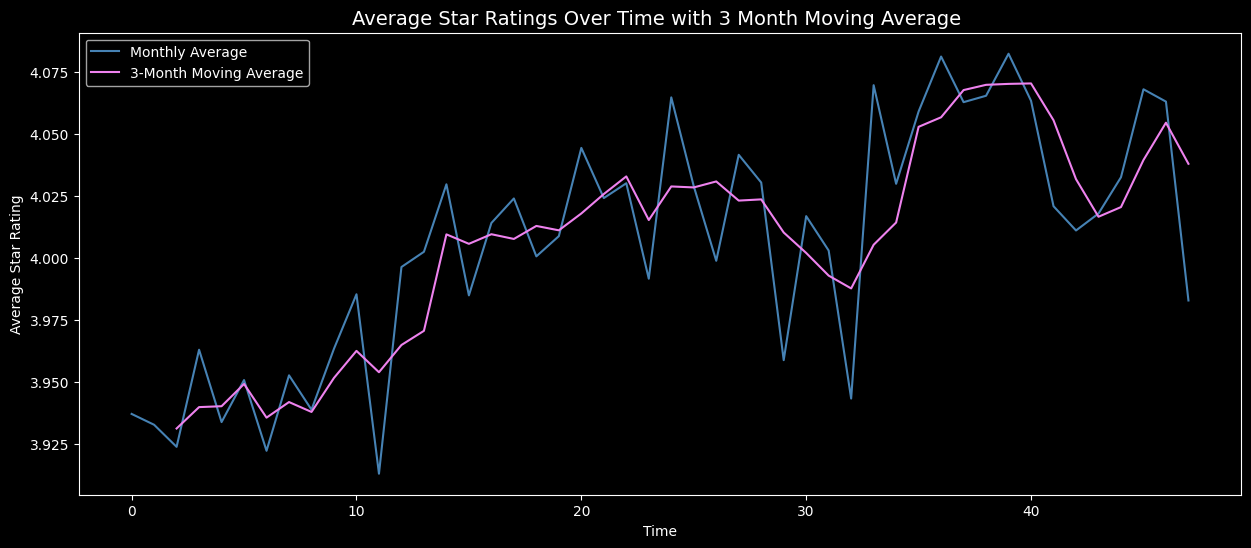

In [29]:
# Calculate 3 month-moving average
df_resampled['3-month-MA'] = df_resampled['stars'].rolling(window=3).mean()

plt.figure(figsize=(15, 6))
plt.plot(df_resampled.index, df_resampled['stars'], color ='steelblue', label = 'Monthly Average')
plt.plot(df_resampled.index, df_resampled['3-month-MA'], color ='violet', label = '3-Month Moving Average')
plt.title('Average Star Ratings Over Time with 3 Month Moving Average ' , fontsize=14)
plt.xlabel('Time')
plt.ylabel('Average Star Rating')
plt.legend(loc='best')
plt.show()

### **Deep Learning**